# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_evaluator import DataSource, DataPredSelection
from base_models import BaseModel
from optimizers import Optimizer
from model_creator import MTLApproach, NAS_MTLApproach

# Start Network runner

In [5]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 10 epochs - without early_stopping in FVC GT dataset NOT aligned',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '10 epochs'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'approach': NAS_MTLApproach.APPROACH_1,
        'reqs': list(cts.ICAO_REQ),
        'aligned': True,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 10,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {
        'max_blocks_per_branch': 3,
        'max_train_steps_per_op': 5
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 129888
Process ID: 130101
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 10 '
                               'epochs - without early_stopping in FVC GT '
                               'dataset NOT aligned',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '10 epochs']},
 'nas_params': {'max_blocks_per_branch': 3, 'max_train_steps_per_op': 5},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fb454ec5e50>}>,
                      'batch_size': 64,
                      'dropout': 0.3,


# Load Data

In [6]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4926, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4926 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5761

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Neural Architecture Search

-------------------- run neural architecture search -------------------
 ----- Training 0 | Config: {'n_denses_0': 2, 'n_denses_1': 2, 'n_denses_2': 4, 'n_denses_3': 2} --------
Creating model...
Model created
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 15,635,054
  .. Trainable params: 920,366
  .. Non-trainable params: 14,714,688
Epoch 1/2
76/76 [==============================] - 46s 550ms/step - loss: 1.4514 - background_loss: 1.0547 - close_loss: 0.7003 - ink_mark_loss: 0.8118 - pixelation_loss: 0.7319 - washed_out_loss: 0.0895 - blurred_loss: 0.9408 - sh_head_loss: 0.5698 - mouth_loss: 0.0336 - veil_loss: 0.7922 - red_eyes_loss: 0.5939 - flash_lenses_loss: 0.3576 - dark_glasses_loss: 0.6986 - l_away_loss: 0.3290 - frame_eyes_loss: 0.6990 - hair_eyes_loss: 0.6939 - eyes_closed_loss: 0.4195 - frames_heavy_loss: 0.2532 - sh_face_loss: 1.4292 - skin_tone_loss: 0.1377 - light_loss: 0.6783 - hat_loss: 0.6439 - rotation_loss: 0.8915 - reflection_loss: 0.96

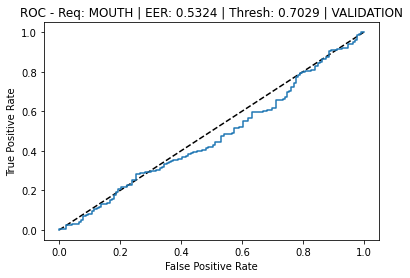

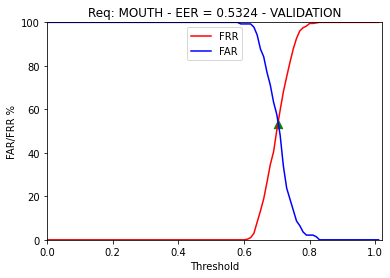

Requisite: MOUTH - EER_interp: 53.239999999999995% - Best Threshold: 0.7029369473457321
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.23      0.47      0.31       139
    COMPLIANT       0.72      0.47      0.57       408

     accuracy                           0.47       547
    macro avg       0.48      0.47      0.44       547
 weighted avg       0.60      0.47      0.51       547

Confusion matrix ----------------------------------------
FAR: 53.239999999999995% | FRR: 52.7% | EER_mean: 52.96999999999999% | TP: 193 | TN: 65 | FP: 74 | FN: 215
Accuracy ------------------------------------------------
Model Accuracy: 47.17%
---------------------------------------------------------
Requisite: ROTATION


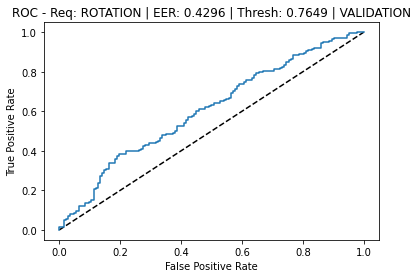

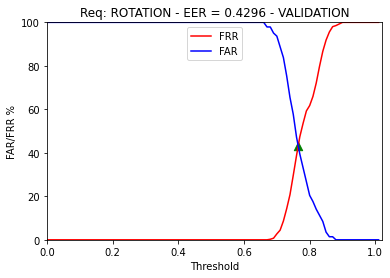

Requisite: ROTATION - EER_interp: 42.96% - Best Threshold: 0.7648582458496118
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.32      0.57      0.41       142
    COMPLIANT       0.79      0.57      0.66       405

     accuracy                           0.57       547
    macro avg       0.55      0.57      0.54       547
 weighted avg       0.67      0.57      0.60       547

Confusion matrix ----------------------------------------
FAR: 42.96% | FRR: 42.96% | EER_mean: 42.96% | TP: 231 | TN: 81 | FP: 61 | FN: 174
Accuracy ------------------------------------------------
Model Accuracy: 57.04%
---------------------------------------------------------
Requisite: L_AWAY


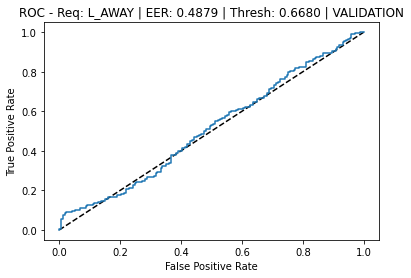

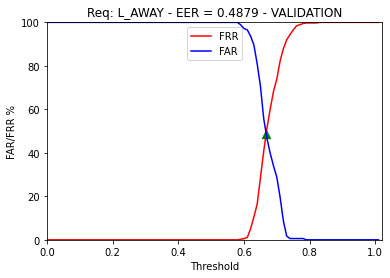

Requisite: L_AWAY - EER_interp: 48.79% - Best Threshold: 0.6679945645639148
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.33      0.51      0.40       174
    COMPLIANT       0.69      0.51      0.59       373

     accuracy                           0.51       547
    macro avg       0.51      0.51      0.49       547
 weighted avg       0.58      0.51      0.53       547

Confusion matrix ----------------------------------------
FAR: 48.85% | FRR: 48.79% | EER_mean: 48.82% | TP: 191 | TN: 89 | FP: 85 | FN: 182
Accuracy ------------------------------------------------
Model Accuracy: 51.190000000000005%
---------------------------------------------------------
Requisite: EYES_CLOSED


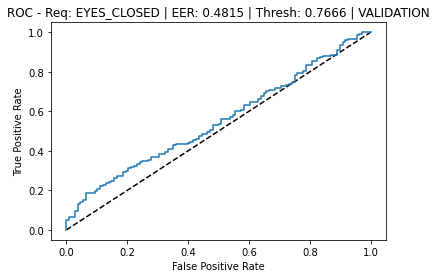

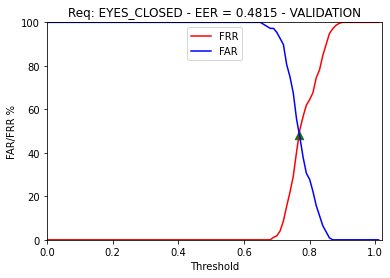

Requisite: EYES_CLOSED - EER_interp: 48.15% - Best Threshold: 0.7665548324584865
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.21      0.52      0.30       108
    COMPLIANT       0.82      0.53      0.64       439

     accuracy                           0.53       547
    macro avg       0.51      0.52      0.47       547
 weighted avg       0.70      0.53      0.57       547

Confusion matrix ----------------------------------------
FAR: 48.15% | FRR: 47.15% | EER_mean: 47.65% | TP: 232 | TN: 56 | FP: 52 | FN: 207
Accuracy ------------------------------------------------
Model Accuracy: 52.65%
---------------------------------------------------------
Requisite: CLOSE


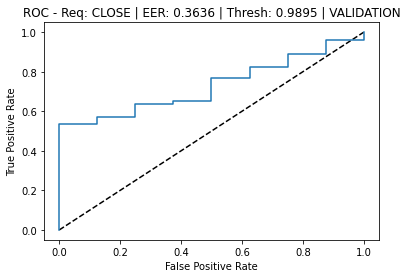

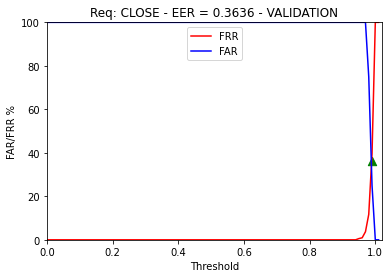

Requisite: CLOSE - EER_interp: 36.36% - Best Threshold: 0.9894629987803373
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.03      0.75      0.06         8
    COMPLIANT       0.99      0.64      0.78       539

     accuracy                           0.64       547
    macro avg       0.51      0.69      0.42       547
 weighted avg       0.98      0.64      0.77       547

Confusion matrix ----------------------------------------
FAR: 25.0% | FRR: 36.36% | EER_mean: 30.680000000000003% | TP: 343 | TN: 6 | FP: 2 | FN: 196
Accuracy ------------------------------------------------
Model Accuracy: 63.800000000000004%
---------------------------------------------------------
Requisite: HAT


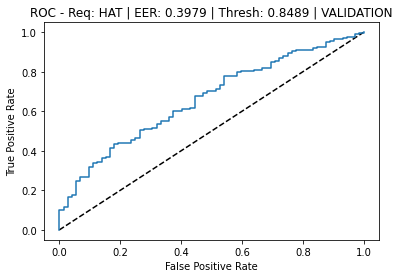

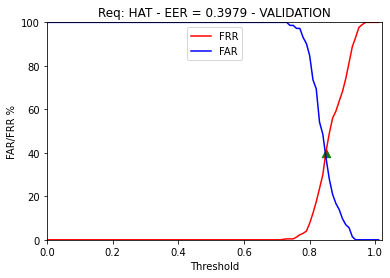

Requisite: HAT - EER_interp: 39.79% - Best Threshold: 0.8489370027341341
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.19      0.61      0.29        72
    COMPLIANT       0.91      0.60      0.72       475

     accuracy                           0.60       547
    macro avg       0.55      0.61      0.51       547
 weighted avg       0.82      0.60      0.67       547

Confusion matrix ----------------------------------------
FAR: 38.89% | FRR: 39.79% | EER_mean: 39.34% | TP: 286 | TN: 44 | FP: 28 | FN: 189
Accuracy ------------------------------------------------
Model Accuracy: 60.33%
---------------------------------------------------------
Requisite: DARK_GLASSES


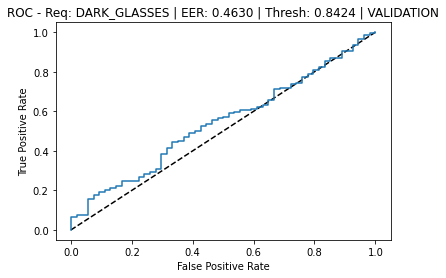

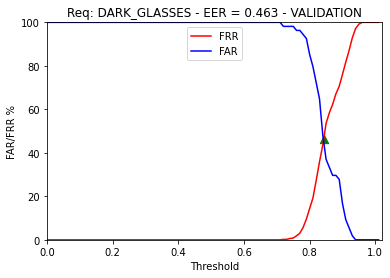

Requisite: DARK_GLASSES - EER_interp: 46.300000000000004% - Best Threshold: 0.8423905968666081
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.11      0.54      0.19        54
    COMPLIANT       0.91      0.54      0.68       493

     accuracy                           0.54       547
    macro avg       0.51      0.54      0.43       547
 weighted avg       0.83      0.54      0.63       547

Confusion matrix ----------------------------------------
FAR: 46.300000000000004% | FRR: 46.45% | EER_mean: 46.379999999999995% | TP: 264 | TN: 29 | FP: 25 | FN: 229
Accuracy ------------------------------------------------
Model Accuracy: 53.559999999999995%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


ZeroDivisionError: division by zero

In [12]:
runner.run_neural_architeture_search()

In [7]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Layer
from tensorflow.keras.models import Model

input_tensor = Input(shape=(20,), name="input")
hidden = Dense(100, activation='relu')(input_tensor)
out = Dense(10, activation='relu', name="out")(hidden)

model = Model(inputs=input_tensor, outputs=out)
model.compile(loss="mse", optimizer='adam')

model.summary()

out = Dense(5, activation='softmax', name='new_out')(model.layers[-2].output)

new_model = Model(input_tensor, out)
new_model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 20)]              0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               2100      
_________________________________________________________________
out (Dense)                  (None, 10)                1010      
Total params: 3,110
Trainable params: 3,110
Non-trainable params: 0
_________________________________________________________________
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 20)]              0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               2100      
_______________________________________